In [305]:
import pandas as pd 
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

  
 
data = {'Feature1':[random.uniform(0, 6) for i in range(100)], 'Feature2':[random.uniform(0, 6) for i in range(100)], 'Feature3':[random.uniform(0, 6) for i in range(100)], 'Feature4':[random.uniform(0,6) for i in range(100)],'Output':[round(random.random()) for i in range(100)]} 
  

df = pd.DataFrame(data) 
  

df.to_csv("dataset.csv",index=False)

In [310]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


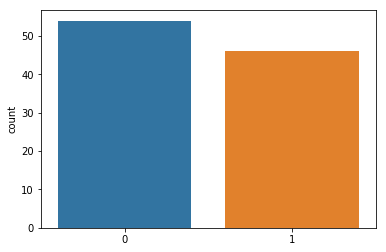

In [311]:

ax = sns.countplot(y,label="Count")      



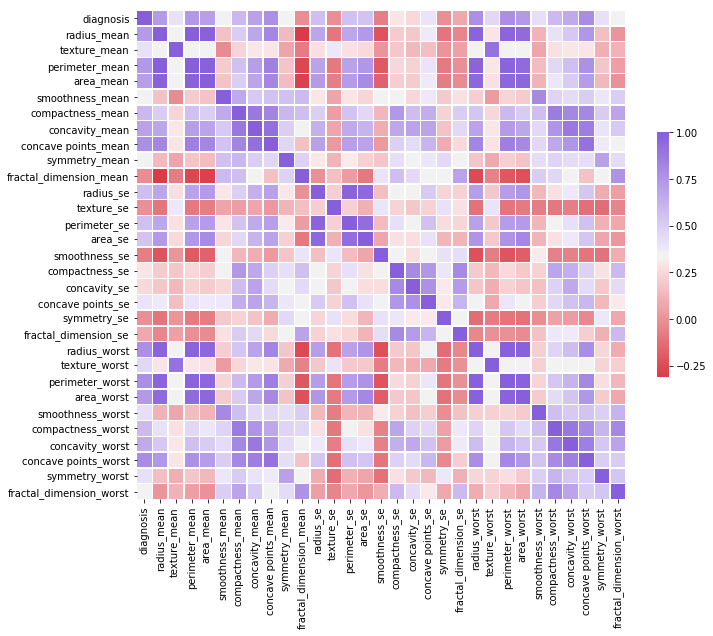

In [334]:
corr = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

In [317]:
#preprocessing
df = df.drop('id',axis=1)
df = df.drop('Unnamed: 32',axis=1)
df.columns.shape
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


learning curve


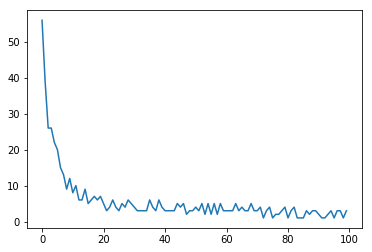

In [333]:
#perceptron

class Perceptron:
    def __init__(self,input_size,epochs=100,alpha=0.02):
        self.epochs = epochs
        self.alpha = alpha
#         self.input_size = input_size
        weight = [random.random() for i in range(input_size+1)]
        weight[0] = 1.0
        self.weight = weight
#         self.weight = np.zeros(input_size+1)
    def activation(self,x):
        return 1 if x>=0 else 0
    def predict(self,x):
#         print(self.weight.T)
#         print(X)
       
        z = np.dot(self.weight,x)
#         print(z)
#         print(self.activation(z))
        a = self.activation(z)
        return a
   
    
    def learn(self,X,d):
        final = []
        for _ in range(self.epochs):
            sum = 0
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1)
                y = self.predict(x)
                e = (d[i] - y)
                self.weight = self.weight + self.alpha*e*x
                sum = sum + e
            final.append(abs(sum))
#             print("Error" +str(sum))
#             print(self.weight)
        print("learning curve")
        plt.plot(range(self.epochs),final)
                
if __name__ == '__main__':

    
#     d = df["Output"].values
#     X = df.drop('Output',axis=1).values
    
    d = df['diagnosis'].values
    X = df.drop('diagnosis',axis=1).values
    
    X_train, X_test, y_train, y_test = train_test_split(X,d, test_size=0.33, random_state=42)
    
    perceptron = Perceptron(input_size=30)
    perceptron.learn(X_train,y_train )
#     print(perceptron.weight)






In [323]:
from sklearn.metrics import accuracy_score

y_pred = []
for i in range(X_train.shape[0]):
    x= np.insert(X_train[i],0,1)
    y_pred.append(perceptron.predict(x))
    
    
print("Training data Accuracy = " +str(accuracy_score(y_train, y_pred)))

y_pred = []
for i in range(X_test.shape[0]):
    x= np.insert(X_test[i],0,1)
    y_pred.append(perceptron.predict(x))

# print(y_pred)
print("Testing data Accuracy = " +str(accuracy_score(y_test, y_pred)))


# perceptron.weight

Training data Accuracy = 0.905511811023622
Testing data Accuracy = 0.9680851063829787


In [335]:
conf = confusion_matrix(y_test, y_pred)

In [325]:
#comparing the probability with The MLPClassifier of Scikit learn

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy = "+str(accuracy_score(y_pred,y_test)))

Accuracy = 0.9574468085106383


In [302]:
from sklearn.metrics import precision_score,recall_score
print("Recall score = "+str(recall_score(y_test, y_pred, average='macro')))
print("Precision score = " + str(precision_score(y_test, y_pred, average='micro')))



Recall score = 0.9536203281115085
Precision score = 0.9574468085106383


In [312]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=3, step=1)
rfe = rfe.fit(x_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

Confusion Matrix:


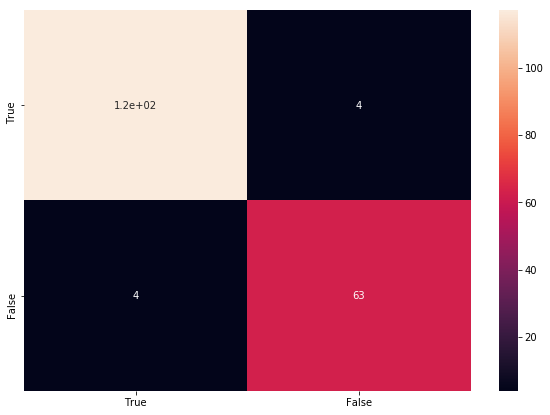

In [341]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
print("Confusion Matrix:")
df_cm = pd.DataFrame(conf, index = [i for i in ("True","False")],
                  columns = [i for i in ("True","False")])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)